In [48]:
# modules to use
import numpy as np
import pandas as pd

# read in the data
nfl_data = pd.read_csv("/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv")

# set seed for reproducibility
np.random.seed(0)


/tmp/ipykernel_33/540425395.py:6: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv("/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv")


In [49]:
# check some of the data for any visible missing data.
print(nfl_data.describe())
nfl_data.head()

             GameID          Drive            qtr           down  \
count  4.076880e+05  407688.000000  407688.000000  346534.000000   
mean   2.013158e+09      12.316158       2.577412       2.002476   
std    2.572839e+06       7.149527       1.129750       1.006353   
min    2.009091e+09       1.000000       1.000000       1.000000   
25%    2.011101e+09       6.000000       2.000000       1.000000   
50%    2.013111e+09      12.000000       3.000000       2.000000   
75%    2.015121e+09      18.000000       4.000000       3.000000   
max    2.017123e+09      35.000000       5.000000       4.000000   

           TimeUnder       TimeSecs   PlayTimeDiff          yrdln  \
count  407688.000000  407464.000000  407244.000000  406848.000000   
mean        7.374200    1695.268944      20.576762      28.488327   
std         4.642388    1062.801012      17.969326      12.946471   
min         0.000000    -900.000000       0.000000       1.000000   
25%         3.000000     778.000000       

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [50]:
# identify missing values
df_rows_null = nfl_data.isnull()
print(df_rows_null) # data frame with null value marked with boolean True / False
df_rows_null.sum() # trick to get the count on null_value on columns - True = 1

         Date  GameID  Drive    qtr   down   time  TimeUnder  TimeSecs  \
0       False   False  False  False   True  False      False     False   
1       False   False  False  False  False  False      False     False   
2       False   False  False  False  False  False      False     False   
3       False   False  False  False  False  False      False     False   
4       False   False  False  False  False  False      False     False   
...       ...     ...    ...    ...    ...    ...        ...       ...   
407683  False   False  False  False   True  False      False     False   
407684  False   False  False  False  False  False      False     False   
407685  False   False  False  False  False  False      False     False   
407686  False   False  False  False  False  False      False     False   
407687  False   False  False  False   True  False      False     False   

        PlayTimeDiff  SideofField  ...  yacEPA  Home_WP_pre  Away_WP_pre  \
0              False        False  

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64

**That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:**

In [51]:
# calculate the percentage of missing cells out of the total cells in the dataframe
# create a function for reuse.

def get_null_info(df):
    """Receive a data frame, and return a DataFrame object contatininig:
        1. Missing value percentage
        2. Total number of values
        3. Total number of missing values"""
    total_cells = np.product(df.shape)
    print(total_cells)
    missing_cells = df.isnull().sum().sum()
    print(missing_cells)
    missing_pct = missing_cells / total_cells *100
    print(missing_pct)
    
    data = { 'Missing value pct.': [ missing_pct ],
            'Total number of values' : [total_cells],
            'Total number of missing values' : [missing_cells] }
    
    return pd.DataFrame(data)

In [52]:
get_null_info(nfl_data)

41584176
10342875
24.87214126835169


,Missing value pct.,Total number of values,Total number of missing values
0,24.872141,41584176,10342875


# 2. Figure out why the data is missing
> **Is this value missing because it wasn't recorded or because it doesn't exist?**   

This is the point at which we get into the part of data science that I like to call "data intution", by which I mean "really looking at your data and trying to figure out why it is the way it is and how that will affect your analysis". It can be a frustrating part of data science, especially if you're newer to the field and don't have a lot of experience. For dealing with missing values, you'll need to use your intution to figure out why the value is missing. One of the most important questions you can ask yourself to help figure this out is this:   

If a value is missing becuase it doesn't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. On the other hand, if a value is missing because it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. This is called imputation, and we'll learn how to do it next! :)



In [53]:
# look at the # of missing values for columns
missing_value_count = nfl_data.isnull().sum()
print(missing_value_count)

# looking at the first 10 columns only for now.
missing_value_count[0:10]

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64


Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

**Drop missing values**   
If you're in a hurry or don't have a reason to figure out why your values are missing, one option you have is to just remove any rows or columns that contain missing values. (Note: I **don't generally recommend this approch for important projects!** It's usually worth it to **take the time to go through your data and really look at all the columns with missing values one-by-one** to really get to **know your dataset**.)

In [54]:
# remove all of the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


Oh dear, it looks like that's **removed all our data!** 😱 This is **because every row in our dataset had at least one missing value**. We might have **better luck removing all the columns that have at least one missing value instead**.

In [55]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [56]:
# how many columns did we loose after the drop? use dataframe.shape --> (#col, #row)
print(nfl_data.shape[1])
print(columns_with_na_dropped.shape[1])

# 102 - 42 = 60 columns removed. removed all 'NaN's from the data


102
41


**Filling in missing values automatically**   

1. Another option is to **try and fill in the missing values**.     
2. For this next bit, I'm getting a **small sub-section of the NFL data** so that it will print well.

In [57]:
# to get a subset of data, slice the columns between 'EPA' and 'Season'
subset_nfl_data = nfl_data.loc[:, 'EPA':"Season"]  # all rows, 'EPA' ~ 'Season' columns
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,NaN,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [58]:
# decide what to fill the Nan with, here, let's fill them with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,0.000000,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,0.000000,0.000000,2017


**Backfill**    
Another method to fill Nan, replace missing values with whatever **value comes directly after it in the same column**. (This makes a lot of sense for datasets **where the observations have some sort of logical order to them**.)

In [60]:
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,NaN,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [61]:
# Fill the column value with NaN with the value that comes directly after it in the same column.
subset_nfl_data2 = subset_nfl_data.fillna(method='bfill', axis=0) # axis=0, along the rows, top to bottom
subset_nfl_data2

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,-0.343085,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,0.000000,-0.021795,-0.008136,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,NaN,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [62]:
# then, the rest of the NaN's with 0.
subset_nfl_data2.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,-0.343085,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,0.000000,-0.021795,-0.008136,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,0.000000,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,0.000000,0.000000,2017


In [63]:
# The above fillna() operations can be done in one line.
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,-0.343085,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,0.000000,-0.021795,-0.008136,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,0.000000,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,0.000000,0.000000,2017


**Handling missing values    
Exercise 1. Load the data and take a look at the data**    
/kaggle/input/building-permit-applications-data/Building_Permits.csv
San Francisco building permits data

In [64]:
# load required modules
import numpy as np
import pandas as pd

# read in the data
sf_permits = pd.read_csv("/kaggle/input/building-permit-applications-data/Building_Permits.csv")

# set seed for reproducibility - 0 
np.random.seed(0)

/tmp/ipykernel_33/2209524639.py:6: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_permits = pd.read_csv("/kaggle/input/building-permit-applications-data/Building_Permits.csv")


In [65]:
# inspect the first 5 rows
sf_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


**Exercise 2. How many missing data points do we have?**

In [66]:
# get the number of missing data points per column
missing_values_count = sf_permits.isnull().sum()

# how many total missing values do we have?
total_cells = np.product(sf_permits.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
percent_missing

26.26002315058403

**Exercise 3. Figure out why the data is missing?**

Look at the columns "**Street Number Suffix**" and "**Zipcode**" from the San Francisco Building Permits dataset. Both of these contain missing values.      

1. Which, if either, are missing because they don't exist?
1. Which, if either, are missing because they weren't recorded?

> If a value in the "Street Number Suffix" column is missing, it is likely because it does not exist. If a value in the "Zipcode" column is missing, it was not recorded.

**Exercise 4.**   
**Drop missing values: rows**

If you removed all of the rows of sf_permits with missing values, how many rows are left?

In [67]:
sf_permits.dropna().shape #(0, 43) 0 rows x 43 cols
sf_permits.dropna().shape[0] # 0

0

**Drop missing values: columns**

Try removing all the columns with empty values.

In [68]:
# remove all columns with at least one missing value
sf_permits_with_na_dropped = sf_permits.dropna(axis=1)

# calculate number of dropped columns
cols_in_original_dataset = sf_permits.shape[1]
cols_in_na_dropped = sf_permits_with_na_dropped.shape[1]
dropped_columns = cols_in_original_dataset - cols_in_na_dropped

sf_permits_with_na_dropped


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,issued,12/05/2017,12/05/2017,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,issued,12/06/2017,12/05/2017,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,issued,12/06/2017,12/06/2017,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,issued,12/06/2017,12/06/2017,1489608233656


**Fill in missing values automatically**

Try replacing all the NaN's in the sf_permits data with the one that comes directly after it and then replacing any remaining NaN's with 0. Set the result to a new DataFrame sf_permits_with_na_imputed.

In [69]:
sf_permits_with_na_imputed = sf_permits.fillna(method="bfill", axis=0).fillna(0)

In [70]:
sf_permits_with_na_imputed

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,0,Montgomery,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,0,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,0,Indiana,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,0,Sutter,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489608233656


# Approaches - Missing Values
https://www.kaggle.com/code/alexisbcook/missing-values/tutorial

1. * **Simple column drop**
1. * **Imputation - fill with values (e.g. mean of non-null values)**
1. * **Imputation extended - Apply imputation with a new 'flag' column (boolean) - '_was_missing'**

In [71]:
# import modules
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data (Melbourne Housing Data)
data = pd.read_csv("/kaggle/input/melbourne-housing-snapshot/melb_data.csv")

# quick data review
data.head() # 5x21

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [72]:
# Set prediction target value
y = data.Price

In [ ]:
# Set predictors (input variables, independent variables, features, estimators, to predict the target)
# Here, using only numerical values for preditors, to exlcude other data types

# drop 'Price' column
melb_predictors = data.drop(['Price'], axis=1)

# check the result data frame
print(melb_predictors.head())

# check the data types in the data to decide what types to be included / excluded
# Will only use numerical types for this project
print(melb_predictors.dtypes) # column-data_type
print(melb_predictors.dtypes.value_counts()) # data_type - count
X = melb_predictors.select_dtypes(exclude = ['object']) # drop the columns in 'object' type
print(X)

# split the data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Apply three missing-value handling approaches above to the model
# and measure the each performance for comparison. 

# Will use RandomFrestRegressor model for training / MAE for accuracy measurement
# Define a function to do them.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
# Define a model, train, predict and evaluate using a training / validation datasets
def score_dataset(X_train, X_valid, y_train, y_valid):
    # define a model - here, using Radom Forest
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    # fit the model - training
    model.fit(X_train, y_train)
    # predict with the model
    preds = model.predict(X_valid)
    
    # return the MAE performance 
    return mean_absolute_error(y_valid, preds)
    

**Try each approach of handing missing-value of the dataset, and train and test the model**

**Approach 1: Simple Drop columns with missing values**

In [73]:
# What columns are with missing values?

# get columns with missing values
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()] # if any value in a column is True, meaning missing value in this example, save it to a list using list comprehension

# drop the selected columns, on botth training / validation dataset
reduced_X_train = X_train.drop(cols_with_missing, axis = 1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis = 1)

# Use the helper function to create a model, train and MAE peformance measurement.
print("MAE from Approach 1 (Drop columns with missing values.)")
score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid) # 183550.22137772635

#print(X_train.columns)
#is_na = X_train.columns.isnull()
#type(is_na)
#help(X_train.columns.isnull)
#help(is_na.any)


MAE from Approach 1 (Drop columns with missing values.)


183550.22137772635

**Approach 2. Imputation**   
SimpleImputation from scikit-learn, by default, replacing the NaN with mean value of the column    
    
* imputed_X_train = pd.DataFrame(my_imputer.**fit_transform(X_train)**) performs imputation on the training data X_train using the fit_transform() method. The fit_transform() method fits the imputer to the training data and transforms it in a single step. The missing values are replaced with the appropriate imputed values, and the result is converted into a new Pandas DataFrame imputed_X_train.

* imputed_X_valid = pd.DataFrame(my_imputer.**transform(X_valid)**) applies the same imputer instance to the validation data X_valid using the transform() method. **The transform() method applies the learned imputation strategy from the training data to the validation data.** The missing values in X_valid are replaced with imputed values, and the result is converted into a new Pandas DataFrame imputed_X_valid.

In [74]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train)) # impute the X_train with missing values --> df
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid)) # impute the X_valid with the same stratigies used in X_train imputation

# Restore columns removed during imputation
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

# Use the helper function to create a model, train and MAE peformance measurement.
print("MAE from Approach 2 (Imputation):")
score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)  # 178166.46269899711


MAE from Approach 2 (Imputation):


178166.46269899711

**We see that Approach 2 has lower MAE than Approach 1, so Approach 2 performed better on this dataset.**

**Approach 3 (An Extension to Imputation)**    
Impute the missing values, while also keeping track of which values were imputed, adding _missing_value

In [75]:
# Will be adding columns to track the missing values, work it on copy of the dataset.
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

In [76]:
# use the list of columns containing any missing values created earlier
# create a new column with suffix '_missing_value'
for col in cols_with_missing:
    X_train_plus[col + '_missing_value'] = X_train_plus[col].isnull() # set values for the column True/False
    X_valid_plus[col + '_missing_value'] = X_valid_plus[col].isnull() # set values for the column True/False

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus)) # impute, column labels to be lost
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))     # impute the same way as done on X_train, column labesl to be lost

# Restore the column labels
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

# Use the helper function to create a model, train and MAE peformance measurement.
print("MAE from Approach 3 (An Extension to Imputation):")
score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid)  # 178927.503183954

MAE from Approach 3 (An Extension to Imputation):


178927.503183954

**As we can see, Approach 3 performed slightly worse than Approach 2.**

## So, why did imputation perform better than dropping the columns?

> **The training data has 10864 rows and 12 columns, where three columns contain missing data. For each column, less than half of the entries are missing. Thus, *dropping the columns removes a lot of useful information*, and so it makes sense that imputation would perform better.**

In [77]:
# shape of the training data
print(X_train.shape) # (10864, 12)

# value count by column
value_count = X_train.isnull().sum()
missing_value_count = value_count[value_count > 0]
print(missing_value_count)

# total missing value count
total_missing_value_count = X_train.isnull().sum().sum() # trick to add up all TRUE's as 1's - 9512
print(total_missing_value_count)

(10864, 12)
Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64
9512


In [78]:
X_train.isnull().sum().sum()

9512

In [79]:
value_count
missing_value_count

Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64

## Conclusion
### As is common, imputing missing values (in Approach 2 and Approach 3) yielded better results, relative to when we simply dropped columns with missing values (in Approach 1).

In [80]:
print("!!Next" + " ===========>"*5)

!!Next ===========> ===========> ===========> ===========> ===========>


# Scaling and Normalization   
How to scale and normalize data and what are the differences

**Environment setup**

In [81]:
# modules required

import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats  

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling  

# plotting
import seaborn as sns
import matplotlib.pyplot as plt 

# set seed for repoducibility
np.random.seed(0)  


**Scaling**

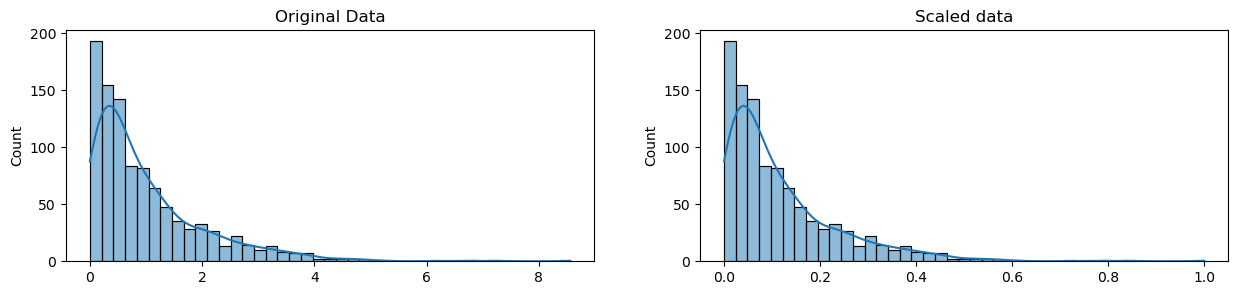

In [82]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

**Normalization**

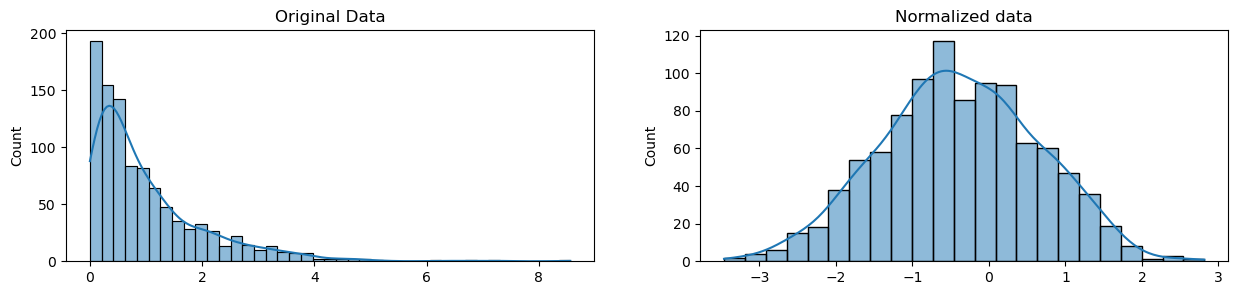

In [83]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

**Exercise: Scaling and Normalization**

**Environment set up**    
To use a dataset of Kickstarter campaigns. (Kickstarter is a website where people can ask people to invest in various projects and concept products.)   
[Kickstarter Projects - More than 300,000 kickstarter projects](https://www.kaggle.com/datasets/kemical/kickstarter-projects)

In [84]:
# modules
import pandas as pd
import numpy as np

# for Box-cox Transformation - Data normalization
from scipy import stats

# for min-max scaling - Data scaling
from mlxtend.preprocessing import minmax_scaling

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# load data
kickstarters_2017 = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)


In [85]:
# looking at some data
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


**Start by scaling the goals for each campagn - how much money do they need? 
After scaling, they all should be between 0 and 1.**

In [86]:
# looking at the column before scaling the data
kickstarters_2017.usd_goal_real

0          1533.95
1         30000.00
2         45000.00
3          5000.00
4         19500.00
            ...   
378656    50000.00
378657     1500.00
378658    15000.00
378659    15000.00
378660     2000.00
Name: usd_goal_real, Length: 378661, dtype: float64

In [ ]:
#----------------------------------------------------------
# now let's scale the data in that column - usd_goal_real
#----------------------------------------------------------

# 1. select the column and save as a data frame
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)
print("Original data: 'usd_goal_real':")
print(original_data)
print("Min:", float(original_data.min()))
print("Max:", float(original_data.max()))
print("-" * 70)

# 2. scale the column from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])
print(scaled_data)
print("Min:", float(scaled_data.min()))
print("Max:", float(scaled_data.max()))
print("-" * 70)

# 3. plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [ ]:
help(sns.histplot)

In [ ]:
help(plt.subplots)

In [ ]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)